#![Spark Logo](http://spark-mooc.github.io/web-assets/images/ta_Spark-logo-small.png) + ![Python Logo](http://spark-mooc.github.io/web-assets/images/python-logo-master-v3-TM-flattened_small.png)
# **First Notebook: Virtual machine test and assignment submission**
#### This notebook will test that the virtual machine (VM) is functioning properly and will show you how to submit an assignment to the autograder.  To move through the notebook just run each of the cells.  You will not need to solve any problems to complete this lab.  You can run a cell by pressing "shift-enter", which will compute the current cell and advance to the next cell, or by clicking in a cell and pressing "control-enter", which will compute the current cell and remain in that cell.  At the end of the notebook you will export / download the notebook and submit it to the autograder.
#### ** This notebook covers: **
#### *Part 1:* Test Spark functionality
#### *Part 2:* Check class testing library
#### *Part 3:* Check plotting
#### *Part 4:* Check MathJax formulas
#### *Part 5:* Export / download and submit

### ** Part 1: Test Spark functionality **

#### ** (1a) Parallelize, filter, and reduce **

In [1]:
# Check that Spark is working
largeRange = sc.parallelize(xrange(100000))
reduceTest = largeRange.reduce(lambda a, b: a + b)
filterReduceTest = largeRange.filter(lambda x: x % 7 == 0).sum()

print reduceTest
print filterReduceTest

# If the Spark jobs don't work properly these will raise an AssertionError
assert reduceTest == 4999950000
assert filterReduceTest == 714264285

4999950000
714264285


#### ** (1b) Loading a text file **

In [2]:
# Check loading data with sc.textFile
import os.path
baseDir = os.path.join('data')
inputPath = os.path.join('cs100', 'lab1', 'shakespeare.txt')
fileName = os.path.join(baseDir, inputPath)

rawData = sc.textFile(fileName)
shakespeareCount = rawData.count()

print shakespeareCount

# If the text file didn't load properly an AssertionError will be raised
assert shakespeareCount == 122395

122395


### ** Part 2: Check class testing library **

#### ** (2a) Compare with hash **

In [3]:
# TEST Compare with hash (2a)
# Check our testing library/package
# This should print '1 test passed.' on two lines
from test_helper import Test

twelve = 12
Test.assertEquals(twelve, 12, 'twelve should equal 12')
Test.assertEqualsHashed(twelve, '7b52009b64fd0a2a49e6d8a939753077792b0554',
                        'twelve, once hashed, should equal the hashed value of 12')

1 test passed.
1 test passed.


#### ** (2b) Compare lists **

In [4]:
# TEST Compare lists (2b)
# This should print '1 test passed.'
unsortedList = [(5, 'b'), (5, 'a'), (4, 'c'), (3, 'a')]
Test.assertEquals(sorted(unsortedList), [(3, 'a'), (4, 'c'), (5, 'a'), (5, 'b')],
                  'unsortedList does not sort properly')

1 test passed.


### ** Part 3: Check plotting **

#### ** (3a) Our first plot **
#### After executing the code cell below, you should see a plot with 50 blue circles.  The circles should start at the bottom left and end at the top right.

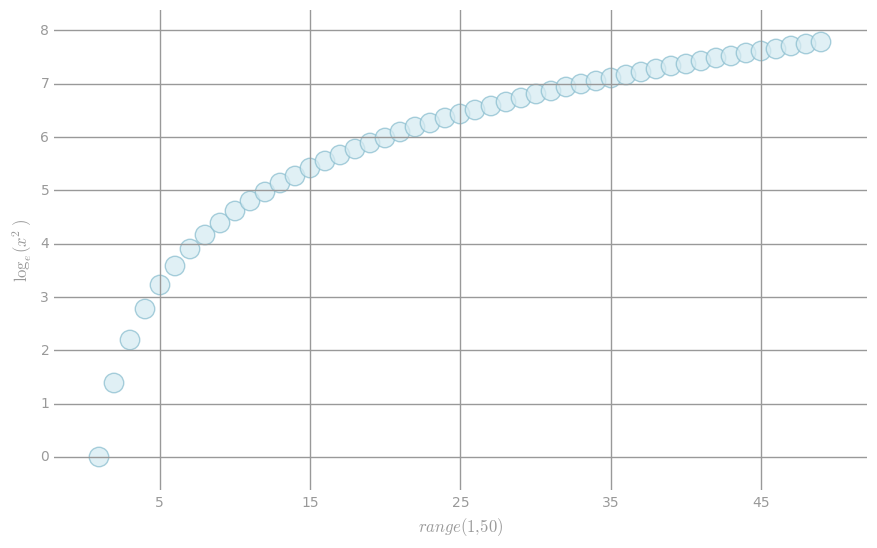

In [5]:
# Check matplotlib plotting
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from math import log

# function for generating plot layout
def preparePlot(xticks, yticks, figsize=(10.5, 6), hideLabels=False, gridColor='#999999', gridWidth=1.0):
    plt.close()
    fig, ax = plt.subplots(figsize=figsize, facecolor='white', edgecolor='white')
    ax.axes.tick_params(labelcolor='#999999', labelsize='10')
    for axis, ticks in [(ax.get_xaxis(), xticks), (ax.get_yaxis(), yticks)]:
        axis.set_ticks_position('none')
        axis.set_ticks(ticks)
        axis.label.set_color('#999999')
        if hideLabels: axis.set_ticklabels([])
    plt.grid(color=gridColor, linewidth=gridWidth, linestyle='-')
    map(lambda position: ax.spines[position].set_visible(False), ['bottom', 'top', 'left', 'right'])
    return fig, ax

# generate layout and plot data
x = range(1, 50)
y = [log(x1 ** 2) for x1 in x]
fig, ax = preparePlot(range(5, 60, 10), range(0, 12, 1))
plt.scatter(x, y, s=14**2, c='#d6ebf2', edgecolors='#8cbfd0', alpha=0.75)
ax.set_xlabel(r'$range(1, 50)$'), ax.set_ylabel(r'$\log_e(x^2)$')
pass

### ** Part 4: Check MathJax Formulas **

#### ** (4a) Gradient descent formula **
#### You should see a formula on the line below this one: $$ \scriptsize \mathbf{w}_{i+1} = \mathbf{w}_i - \alpha_i \sum_j (\mathbf{w}_i^\top\mathbf{x}_j  - y_j) \mathbf{x}_j \,.$$
 
#### This formula is included inline with the text and is $ \scriptsize (\mathbf{w}^\top \mathbf{x} - y) \mathbf{x} $.

#### ** (4b) Log loss formula **
#### This formula shows log loss for single point. Log loss is defined as: $$  \begin{align} \scriptsize \ell_{log}(p, y) = \begin{cases} -\log (p) & \text{if } y = 1 \\\ -\log(1-p) & \text{if } y = 0 \end{cases} \end{align} $$

### ** Part 5: Export / download and submit **

#### ** (5a) Time to submit **

#### You have completed the lab.  To submit the lab for grading you will need to download it from your IPython Notebook environment.  You can do this by clicking on "File", then hovering your mouse over "Download as", and then clicking on "Python (.py)".  This will export your IPython Notebook as a .py file to your computer.
#### To upload this file to the course autograder, go to the edX website and find the page for submitting this assignment.  Click "Choose file", then navigate to and click on the downloaded .py file.  Now click the "Open" button and then the "Check" button.  Your submission will be graded shortly and will be available on the page where you submitted.  Note that when submission volumes are high, it may take as long as an hour to receive results.